# ML (Simple Linear Regression)

Salary Predictor using Simple linear Regression 
1. Import all the required libraries (ex. Numpy, pandas...etc.)
2. Read the OLS dataset
3. Produce a scatter-plot of the data
4. Divide the dataset into training and testing data with an approximate ratio of 70/30 respectively
5. Create a function that uses the train portion of the data to produce a program that predicts the
Salary based on the Years of Experience
6. Test the algorithm using the test portion of the data
7. Bonus: What is an adequate performance measure for this model? → Implement it!




In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


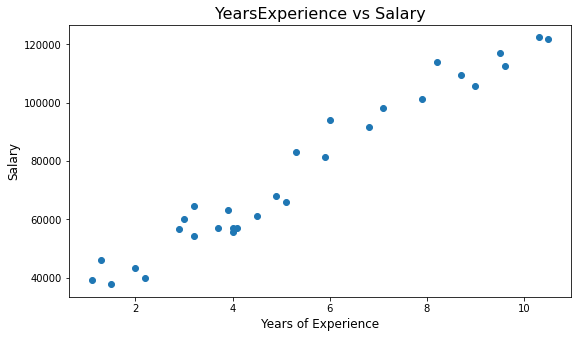

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title('YearsExperience vs Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

In [ ]:
X = df['Salary']
y = df['YearsExperience']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [ ]:
# Own predictive model based on OLS 

x_avg = X_train.sum()/X_train.count()
y_avg = y_train.sum()/y_train.count()

b1_num = 0
b1_dem = 0

for i in range(0, X_train.count()):
  x_brac = X_train.iloc[i] - x_avg
  y_brac = y_train.iloc[i] - y_avg 
  b1_num += x_brac * y_brac
  b1_dem += (x_brac**2)

b1 = b1_num / b1_dem
b0 = y_avg - (b1*x_avg)

In [ ]:
def predict(x_value):
  return b1*x_value + b0

predictions = []
for i in range (0, X_test.count()):
  predictions += [predict(X_test.iloc[i])]

print(y_test)

2      1.5
28    10.3
13     4.1
10     3.9
26     9.5
24     8.7
27     9.6
11     4.0
17     5.3
Name: YearsExperience, dtype: float64


In [ ]:
predictions

[1.3840450917620486,
 9.907493226820716,
 3.3321755124257058,
 3.950039925428954,
 9.361613994736047,
 8.602698898562267,
 8.925273051937271,
 3.2026021867722623,
 5.950523204942487]

MSE 

In [ ]:
from sklearn.metrics import mean_squared_error  
# Given values  
Y_act = y_test  # Y_true = Y (original values)  
           
# Calculation of Mean Squared Error (MSE)  
print("Mean Square Error: \n")
print(mean_squared_error(Y_act,predictions))

Mean Square Error: 

0.255829322615192


RMSE

In [ ]:
import math  
        
MSE = np.square(np.subtract(y_test,predictions)).mean()   
       
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

0.5057957321045641
